**Pytorch:** A deep learning library that lets you train your models and perform tensor operations on high dimensional matrices

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import numpy as np
import torchvision.models as models
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import torchvision

#Training your Model Using MNIST DATASET

In [ ]:
epochs = 5
batch_size_train = 64
batch_size_val = 64
learning_rate = 1e-3

In [ ]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
  batch_size=batch_size_train, shuffle=True)

val_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
  batch_size=batch_size_val, shuffle=True)

images size: torch.Size([64, 1, 28, 28]), label size: torch.Size([64])
images size: torch.Size([64, 1, 28, 28]), label size: torch.Size([64])
images size: torch.Size([64, 1, 28, 28]), label size: torch.Size([64])
images size: torch.Size([64, 1, 28, 28]), label size: torch.Size([64])
images size: torch.Size([64, 1, 28, 28]), label size: torch.Size([64])


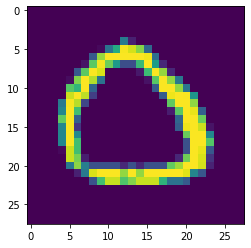

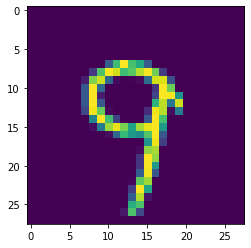

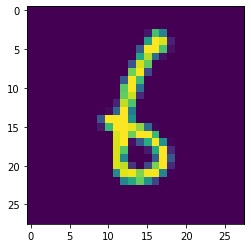

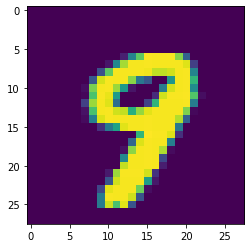

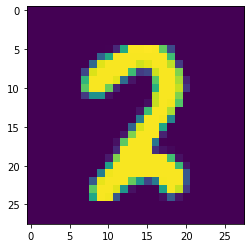

In [ ]:
iter = 0
for i, data in enumerate(val_loader):

  image, label = data

  print("images size: {}, label size: {}".format(image.size(),label.size()))
  plt.figure()
  plt.imshow(image[10,0,:,:]) 
  iter += 1
  if(iter == 5):
    break

In [ ]:
class MNISTClassifier(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = torch.nn.Conv2d(1 , 4 , padding =[1,1], kernel_size = [3,3])
        self.conv2 = torch.nn.Conv2d(4, 8 , padding = [1,1], kernel_size = [3,3])
        self.fc1 = torch.nn.Linear(392, 10)
        self.mp = torch.nn.MaxPool2d(kernel_size = [2,2],stride = [2,2])
 
    def forward(self, x):

        x = self.mp(F.relu(self.conv1(x)))
        x = (self.mp(F.relu(self.conv2(x))))
        x = x.flatten(1)
        x = self.fc1(x)

        return x

In [ ]:
net = MNISTClassifier().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr = learning_rate)

Epoch: 0, Training_Loss: 1.574310247577838, Accuracy: 0.5677971839904785
##########
Epoch: 0, Validation_Loss: 0.7102817707001023, Accuracy: 0.8142914175987244
####################################
Epoch: 1, Training_Loss: 0.548220057207257, Accuracy: 0.8437000513076782
##########
Epoch: 1, Validation_Loss: 0.42885334599929253, Accuracy: 0.8724124431610107
####################################
Epoch: 2, Training_Loss: 0.413094746707472, Accuracy: 0.8788146376609802
##########
Epoch: 2, Validation_Loss: 0.36145377700116227, Accuracy: 0.8913216590881348
####################################
Epoch: 3, Training_Loss: 0.3624210369739451, Accuracy: 0.8931570053100586
##########
Epoch: 3, Validation_Loss: 0.32549453806725276, Accuracy: 0.9044585824012756
####################################
Epoch: 4, Training_Loss: 0.33146830510769065, Accuracy: 0.9012359976768494
##########


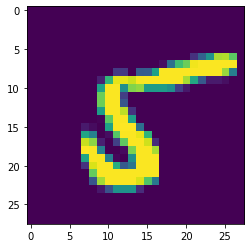

Prediction: tensor(5, device='cuda:0')


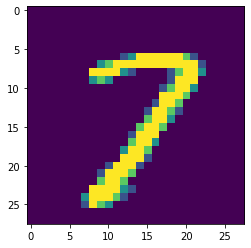

Prediction: tensor(7, device='cuda:0')
Epoch: 4, Validation_Loss: 0.30309108151182246, Accuracy: 0.9108280539512634
####################################


In [ ]:
for i in range(epochs):

  torch.cuda.empty_cache()
  training_loss = 0
  train_accuracy = 0
  iter = 0

  net.train()
  for j, data in enumerate(train_loader):

    optimizer.zero_grad()
    image, label = data

    image = image.cuda()
    label = label.cuda()

    outputs = net(image)
    loss = criterion(outputs,label)

    loss.backward()
    optimizer.step()

    _, predictions = torch.max(outputs.data,1)
    train_accuracy += (predictions.cpu() == label.cpu()).sum()

    training_loss += loss.item()
    iter += 1
    """
    if (iter == 1):
      plt.figure()
      plt.imshow(image[10,0,:,:].cpu())
      plt.show()
      print('Prediction:',label[10])"""

  print('Epoch: {}, Training_Loss: {}, Accuracy: {}'.format(i, training_loss/iter, train_accuracy.float()/(batch_size_train*iter))) 
  print("##########")

  net.eval()   
  evaluation_loss = 0
  val_accuracy = 0
  iter = 0

  for j,data in enumerate(val_loader):

    image, label = data

    image = image.cuda()
    label = label.cuda()

    outputs = net(image)
    loss = criterion(outputs,label)

    _, predictions = torch.max(outputs.data,1)
    val_accuracy += (predictions.cpu() == label.cpu()).sum()

    evaluation_loss += loss.item()
    iter += 1

    if (i == epochs-1 and iter < 3):
      plt.figure()
      plt.imshow(image[10,0,:,:].cpu())
      plt.show()
      print('Prediction:',label[10])


  print('Epoch: {}, Validation_Loss: {}, Accuracy: {}'.format(i, evaluation_loss/iter, val_accuracy.float()/(batch_size_val*iter))) 
  print("####################################")


#TORCH TENSORS
You can perform most of the basic matrix manipulation operations on tensors as you do them on numpy arrays 

In [ ]:
a = np.ones(5)
print(a)

[1. 1. 1. 1. 1.]


In [ ]:
b = torch.ones(5)
print(b)

tensor([1., 1., 1., 1., 1.])


In [ ]:
tensor = torch.rand((5,5))
print(tensor)

#logical indexing
tensor[tensor < 0.5] = 0
print(tensor)

tensor([[0.8390, 0.8872, 0.0251, 0.1116, 0.8156],
        [0.1632, 0.0419, 0.4302, 0.7072, 0.5103],
        [0.6598, 0.7666, 0.9879, 0.7735, 0.4515],
        [0.7875, 0.2837, 0.7641, 0.5113, 0.7068],
        [0.8327, 0.0403, 0.9529, 0.6640, 0.2433]])
tensor([[0.8390, 0.8872, 0.0000, 0.0000, 0.8156],
        [0.0000, 0.0000, 0.0000, 0.7072, 0.5103],
        [0.6598, 0.7666, 0.9879, 0.7735, 0.0000],
        [0.7875, 0.0000, 0.7641, 0.5113, 0.7068],
        [0.8327, 0.0000, 0.9529, 0.6640, 0.0000]])


In [ ]:
#We can convert from numpy to torch tensor and vice versa very easily
array = np.random.random_sample((5,5))
print(array)
tensor = torch.from_numpy(array)
print(tensor)
converted_array = tensor.numpy()
print(converted_array)

In [ ]:
#Initialize a PyTorch Tensor

x = torch.FloatTensor([1,4])
x = torch.LongTensor([1,3])
x = torch.Tensor([1,3])
x = torch.long()
##########

x = torch.zeros(5,3,dtype=torch.long)
print(x)
x = x.float()
print(x)

https://pytorch.org/docs/stable/tensors.html

**Enabling GPU's for performing operations on Tensors:**
Make sure that you have enabled your GPU in colab 

In [ ]:
t1 = torch.rand(5).cuda()
t2 = torch.rand(5)
t2 = t2.cuda()
print((t1 + t2))

tensor([0.7551, 1.5477, 1.1487, 1.7083, 1.2906], device='cuda:0')


In [ ]:
print(t1.device)

cuda:0


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
t = torch.rand(5)
print(t)

##push it to gpu
t = t.to(device)
print(t)

##push back to cpu
t = t.cpu()
print(t)

tensor([0.3803, 0.2478, 0.6800, 0.7197, 0.7619])
tensor([0.3803, 0.2478, 0.6800, 0.7197, 0.7619], device='cuda:0')
tensor([0.3803, 0.2478, 0.6800, 0.7197, 0.7619])


#Neural Networks:

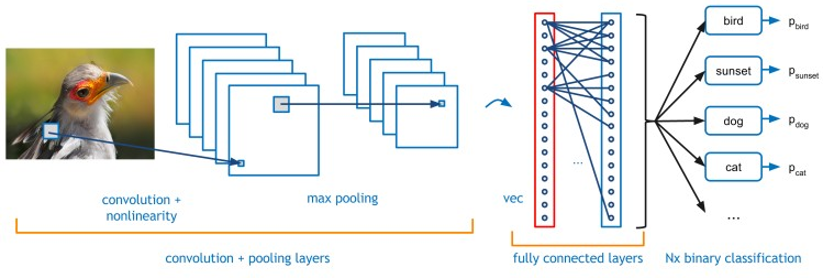

#Major Components:


*   Data Collection: Set of Images and their corresponging ground truth label's
*   Data Preprocessing
*   Defining the Architecture
*   Forward Pass
*   Loss Calculation
*   Backward Pass



#Data Preprocesseing in Pytorch:
Size of the Image -> (H,W,3)

Size of Tensor -> (3,H,W)

Batchers of Tensors -> (N,3,H,W)

(481, 321)


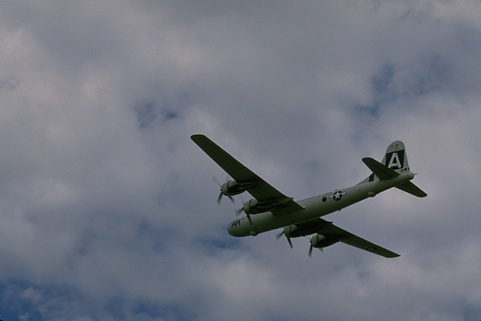

In [ ]:
img = Image.open('/content/drive/My Drive/581/Code/Images/3096.jpg')
print(img.size)
display(img)

(481, 481)


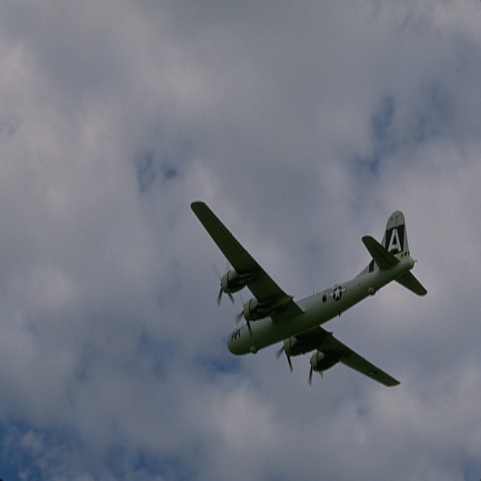

In [ ]:
img = transforms.Resize((481,481))(img)
print(img.size)
display(img)

In [ ]:
#converting images to tensors
img_tensor = transforms.ToTensor()(img)
print(img_tensor.shape)

torch.Size([3, 481, 481])


Other Operations that you might want to look into are:


*   [GrayScale](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Grayscale)
*   [Random Crop](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomCrop)
*   [Normalize](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize)
*   [Random Rotation](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomRotation)


**Backward and Forward Pass**
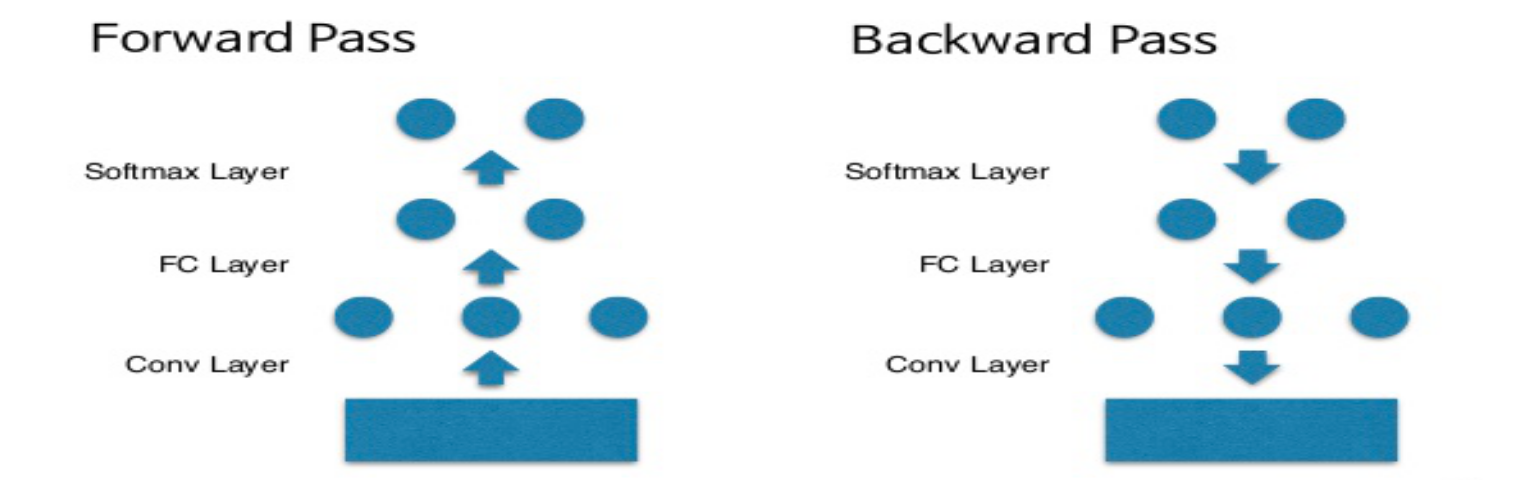

In [ ]:
#Backward in Pytorch
a = torch.rand(1)
b = torch.rand(1)
sum = a + b
sum.backward()

RuntimeError: ignored

In [ ]:
#Backward in Pytorch
a = torch.rand((1),requires_grad=True)
b = torch.rand((1),requires_grad=True)
sum = a + b
sum.backward()

##Model Architecture:


*   [Linear Layers](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)
*   [Convolution Layers](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d)
*   [Maxpool 2D](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d)
*   [RelU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU)
*   [Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid)
*   [Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#torch.nn.Softmax)




## Model in PyTorch
PyTorch offers a unified way to define a model: extends the existing Pytorch Module. 
```python
class Model(torch.nn.Module):
    def __init__(self, var):
        super().__init__()
        self.var = var
        
        self.length = xxx
    def count_number(self,var):
      return xxx
    def forward(self, x):
        out = f(x)
        x = self.length
        y = self.count_number(self.var)
        return out
```

 There are two functions to overload:
 1. \_\_init\_\_ constructor function. First we need to initialize torch.nn.Module with super().\_\_init\_\_(). Then we initialize a few variables we need.
 2. forward function. We define the computation model in the forward function, and the gradient computation will be taken care of by the PyTorch.


 PyTorch has built-in support for common neural network layers. Usually we define them in the \_\_init\_\_ function and then call them in the forward function. For example,

 ```python
class Model(torch.nn.Module):
    def __init__(self, var):
        super().__init__()
        self.fc1 = torch.nn.Linear(in_dim, out_dim1)
        self.fc2 = torch.nn.Linear(out_dim1, out_dim2)

    def forward(self, x):
        out = self.fc2(self.fc1(x))
        return out
```

For consequtive layers, we can also use torch.nn.Sequential to chain them together
 ```python
class Model(torch.nn.Module):
    def __init__(self, var):
        super().__init__()
        self.net = torch.Sequential(
            torch.nn.Linear(in_dim, out_dim1),
            torch.nn.Linear(out_dim1, out_dim2)
        )


    def forward(self, x):
        out = self.net(x)
        return out
```

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = torch.nn.Conv2d(num_channels,out_channels1,padding = [1,1], kernel_size = [3,3])
        self.conv1 = torch.nn.Conv2d(out_channels1,out_channels2,padding = [2,1], kernel_size = [4,4])
        self.fc1 = torch.nn.Linear(in_dim, out_dim1)
        self.fc2 = torch.nn.Linear(out_dim1, out_dim2)
        self.mp = torch.nn.MaxPool2d(kernel_size = [2,2],stride = [1,1])
 
    def forward(self, x):
        x = self.mp1(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = x.flatten(1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        out = self.sigmoid(x)
        return out

## Loss function
PyTorch also has built-in support for common loss functions. 
1. torch.nn.L1Loss
2. torch.nn.MSELoss
3. torch.nn.CrossEntropyLoss

#Optimizer


We use gradient descent as the optimization algorithm to minimize the loss function. There are also other advanced optimization algorithms. PyTorch wraps up these algorithms in the optimizer class. 
To create an optimizer, we need to tell it what to optimize: typically we pass in parameters of the model we defined earlier. We can also specify the learning rate. 



*   Stochastic Gradient Descent (SGD)
*   Adam



#Custom DataLoader

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform):

        self.transform = transform
        self.args = args
        self.data = data
        self.label = label
        
    def __len__(self):
        return self.len

    def __getitem__(self, idx):

        sample_data = self.transform(self.data[idx])
        sample_label = self.label[idx]

        return (sample_data,sample_label)

In [ ]:
transform = transforms.Compose([ToTensor(),transforms.Normalize(mean=[],std = [])])

train_loader = DataLoader(CustumDataset(train_images,train_labels,transform),batch_size,shuffle=True)
val_loader = DataLoader(CustumDataset(val_images,val_labels,transform),batch_size,shuffle,True)

#Putting it all together

In [ ]:
net = model().cuda()
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(net.parameters(),lr = 1e-3)
epochs = 10

In [ ]:
for i in range(epochs):

  torch.cuda.empty_cache()
  training_loss = 0
  iter = 0

  model.train()
  for j, data in enumerate(train_loader):

    optimizer.zero_grad()
    image, label = data

    image = image.cuda()
    label = label.cuda()

    outputs = model(image)
    loss = criterion(outputs,label)

    loss.backward()
    optimizer.step()

    training_loss += loss.item()
    iter++

  print('Epoch: {}, Training_Loss: {}'.format(i, training_loss/iter)) 

  model.eval()   
  evaluation_loss = 0
  iter = 0

  for j,data in enumerate(val_loader):

    image, label = data

    image = image.cuda()
    label = label.cuda()

    outputs = model(image)
    loss = criterion(outputs,label)

    evaluation_loss += loss.item()
    iter += 1

  print('Epoch: {}, Evaluation_Loss: {}'.format(i, evaluation_loss/iter)) 

#Exercise: Build your own Neural Network

MNIST Dataset:


In [ ]:
epochs = ____
batch_size_train = ____
batch_size_val = ____
learning_rate = _____

In [ ]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
  batch_size=batch_size_train, shuffle=True)

val_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
  batch_size=batch_size_val, shuffle=True)

In [ ]:
#Visuzlize Image:
for i, data in enumerate(val_loader):

  images, label = data

  print("images size: {}, label size: {}".format(image.size(),label.size()))
  plt.imshow(images[0,:,:]) 
  break

In [ ]:
class MNISTClassifier(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = torch.nn.Conv2d(____  ,, ___ , padding = , kernel_size = )
        self.conv1 = torch.nn.Conv2d(_____, ___ , padding = , kernel_size = )
        self.fc1 = torch.nn.Linear(___, ___)
        self.fc2 = torch.nn.Linear(___, ____)
        self.mp = torch.nn.MaxPool2d(kernel_size = ____,stride = ___)
 
    def forward(self, x):

        return out

In [ ]:
model = MNISTClassifier().cuda()
criterion = ______
optimizer = optim._____(net.parameters(),lr = learning_rate)

In [ ]:
for i in range(epochs):

  torch.cuda.empty_cache()
  training_loss = 0
  train_accuracy = 0
  iter = 0

  net.train()
  for j, data in enumerate(train_loader):

    optimizer.zero_grad()
    image, label = data

    image = image.cuda()
    label = label.cuda()

    outputs = net(image)
    loss = criterion(outputs,label)

    loss.backward()
    optimizer.step()

    _, predictions = torch.max(outputs.data,1)
    train_accuracy += (predictions.cpu() == label.cpu()).sum()

    training_loss += loss.item()
    iter += 1

  print('Epoch: {}, Training_Loss: {}, Accuracy: {}'.format(i, training_loss/iter, train_accuracy.float()/(batch_size_train*iter))) 

  net.eval()   
  evaluation_loss = 0
  val_accuracy = 0
  iter = 0

  for j,data in enumerate(val_loader):

    image, label = data

    image = image.cuda()
    label = label.cuda()

    outputs = net(image)
    loss = criterion(outputs,label)

    _, predictions = torch.max(outputs.data,1)
    val_accuracy += (predictions.cpu() == label.cpu()).sum()

    evaluation_loss += loss.item()
    iter += 1

  print('Epoch: {}, Training_Loss: {}, Accuracy: {}'.format(i, evaluation_loss/iter, val_accuracy.float()/(batch_size_val*iter))) 
  print("#########")